# Health Insurance Cost Prediction

## Project Overview

The important insurance company **4Geeks Insurance S.L.** wants to calculate, based on the physiological data of its customers, what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

## Objective
**Predicting the cost of health insurance for a person** using linear regression based on various physiological and demographic factors.

## Project Steps

### Step 1: Loading the dataset
The dataset can be found at: https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv

**Dataset Variables:**
- `age`: Age of primary beneficiary (numeric)
- `sex`: Gender of the primary beneficiary (categorical)
- `bmi`: Body mass index (numeric)
- `children`: Number of children/dependents covered by health insurance (numeric)
- `smoker`: Is the person a smoker? (categorical)
- `region`: Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
- `charges`: Health insurance premium (numerical) - **TARGET VARIABLE**

### Step 2: Perform a full EDA
Exploratory Data Analysis to understand the data and select relevant features.

### Step 3: Build a linear regression model
Create a baseline linear regression model with default parameters.

### Step 4: Optimize the model
Improve the model performance through feature engineering and hyperparameter tuning.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
import pickle 
import os 
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

## Step 1: Loading the Dataset

Let's load the medical insurance cost dataset directly from the provided URL and explore its basic structure.

In [3]:
# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1338, 7)

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Get detailed information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nChecking for missing values:")
print(df.isnull().sum())
print("\nUnique values in categorical columns:")
print("Sex:", df['sex'].unique())
print("Smoker:", df['smoker'].unique()) 
print("Region:", df['region'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Dataset Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.6

### Dataset Summary

**Dataset Structure**: 1,338 insurance records with 7 variables (4 numerical, 3 categorical)

**Data Quality**: Complete dataset with no missing values - ready for analysis

**Key Statistics**:
- **Age**: 18-64 years (mean: 39 years)
- **BMI**: 15.96-53.13 (mean: 30.66)
- **Children**: 0-5 dependents (mean: 1.09)
- **Charges**: $1,122-$63,770 (mean: $13,270) - wide cost variation suggests strong predictive potential

**Categorical Variables**: Balanced gender distribution, binary smoker status, and 4 US regions

The dataset appears clean and well-structured for building our linear regression model.


### Dataset Exploration
Let's examine the dataset structure, data types, and check for any data quality issues.

## Step 2: Exploratory Data Analysis (EDA)

Since the dataset appears clean (no missing values), we'll focus on understanding relationships between variables and preparing the data for modeling:

1. **Target variable distribution**: Analyze the distribution of insurance charges
2. **Categorical variables encoding**: Prepare categorical variables for the model
3. **Feature relationships**: Quick correlation analysis
4. **Train-test split**: Prepare data for modeling

### Target Variable Analysis
Understanding the distribution of our target variable (insurance charges) is crucial for model selection and evaluation.

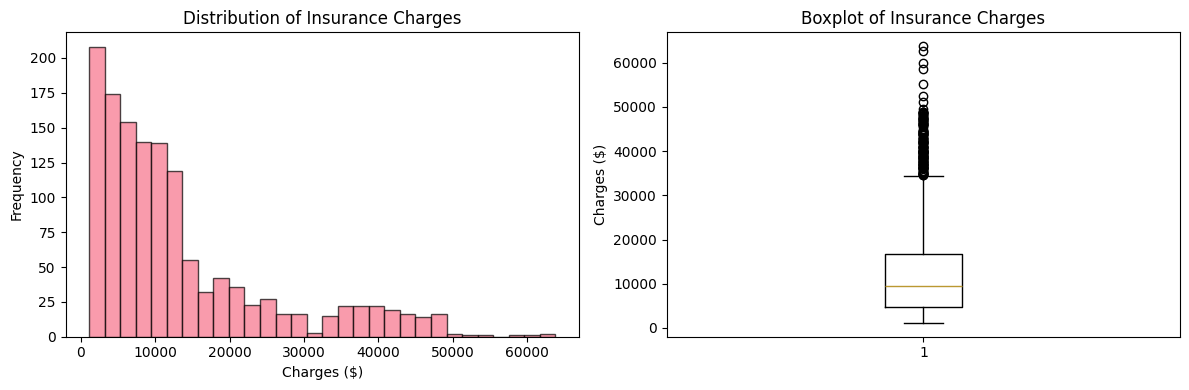

Target variable (charges) statistics:
Mean: $13270.42
Median: $9382.03
Std: $12110.01


In [5]:
# Quick visualization of target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.title('Boxplot of Insurance Charges')
plt.ylabel('Charges ($)')

plt.tight_layout()
plt.show()

print(f"Target variable (charges) statistics:")
print(f"Mean: ${df['charges'].mean():.2f}")
print(f"Median: ${df['charges'].median():.2f}")
print(f"Std: ${df['charges'].std():.2f}")

### Categorical Variables Encoding
Linear regression requires numerical inputs, so we need to encode categorical variables (sex, smoker, region) into numerical format.

In [6]:
# Prepare categorical variables for modeling
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Display the processed dataframe structure
print(f"\nProcessed dataframe shape: {df_processed.shape}")
print(f"Columns: {list(df_processed.columns)}")

sex: {'female': np.int64(0), 'male': np.int64(1)}
smoker: {'no': np.int64(0), 'yes': np.int64(1)}
region: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}

Processed dataframe shape: (1338, 10)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_encoded', 'smoker_encoded', 'region_encoded']


### Feature Correlation Analysis
Analyzing correlations helps us understand which features have the strongest relationships with insurance charges.

Correlation with target variable (charges):
charges           1.000000
smoker_encoded    0.787251
age               0.299008
bmi               0.198341
children          0.067998
sex_encoded       0.057292
region_encoded   -0.006208
Name: charges, dtype: float64


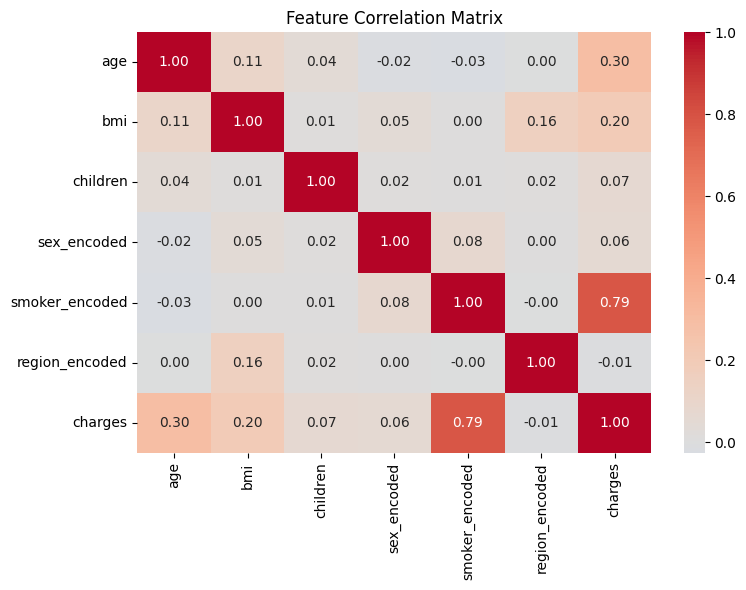

In [7]:
# Quick correlation analysis with target variable
# Select features for modeling (numerical + encoded categorical)
feature_columns = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']
target_column = 'charges'

# Calculate correlations with target
correlations = df_processed[feature_columns + [target_column]].corr()[target_column].sort_values(ascending=False)
print("Correlation with target variable (charges):")
print(correlations) 

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_processed[feature_columns + [target_column]].corr(), 
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

### Data Preparation for Modeling
Split the data into training and testing sets to evaluate model performance on unseen data.

In [8]:
# Prepare features and target for modeling
X = df_processed[feature_columns]
y = df_processed[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.columns.tolist()}")
print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Target vector shape: {y_train.shape}")

Training set size: 1070 samples
Testing set size: 268 samples
Features: ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']

Feature matrix shape: (1070, 6)
Target vector shape: (1070,)


## Step 3: Build Linear Regression Model

Now we'll create a baseline linear regression model with default parameters and evaluate its performance.

### Model Training and Evaluation
Train the linear regression model and evaluate its performance using standard metrics (R², RMSE, MAE).

In [9]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"Testing MAE: ${test_mae:.2f}")

# Feature coefficients
print(f"\n=== Feature Importance (Coefficients) ===")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance)

=== Model Performance ===
Training R²: 0.7417
Testing R²: 0.7833
Training RMSE: $6105.79
Testing RMSE: $5799.59
Testing MAE: $4186.51

=== Feature Importance (Coefficients) ===
          Feature   Coefficient
4  smoker_encoded  23647.818096
2        children    425.091456
1             bmi    335.781491
5  region_encoded   -271.284266
0             age    257.056264
3     sex_encoded    -18.791457


## Baseline Model Results Summary

**Performance**: Our baseline linear regression model shows good predictive power with an **R² of 0.78** on test data, explaining about 78% of the variance in insurance charges. The model generalizes well (test R² > training R²), indicating no overfitting.

**Key Insights**:
- **Smoking status** is by far the strongest predictor, increasing costs by ~$23,648
- **Number of children** and **BMI** also positively impact costs (+$425 per child, +$336 per BMI unit)
- **Age** shows moderate positive correlation (+$257 per year)
- **Gender** and **region** have minimal impact on insurance costs

**Error Metrics**: Average prediction

The model provides a solid baseline for Step 4 optimization.

## Step 4: Optimize the model
Improve the model performance through feature engineering and hyperparameter tuning.

### Why We Don't Need Feature Scaling

Before proceeding with optimization, it's important to address **feature scaling**. Unlike algorithms such as SVM, KNN, or neural networks, **linear regression doesn't require feature scaling** for several reasons:

1. **Mathematical Independence**: Linear regression finds optimal coefficients regardless of feature scales by adjusting coefficient magnitudes automatically
2. **Interpretability**: Unscaled features preserve real-world meaning (e.g., "each year of age increases cost by $257")
3. **No Distance-Based Calculations**: Linear regression doesn't rely on distance metrics that can be distorted by different scales
4. **Closed-Form Solution**: The algorithm has an analytical solution that isn't affected by convergence issues related to scaling

**Our features have reasonable scales**: age (18-64), BMI (15-53), children (0-5), and encoded categories (0-3), so scaling would only reduce interpretability without improving performance.

### Feature Engineering for Model Improvement

Now let's explore feature engineering techniques to improve our model performance. We'll create new features that might capture important relationships in the data.

In [10]:
# Create enhanced features through feature engineering
df_enhanced = df_processed.copy()

# 1. Age groups (different risk categories)
df_enhanced['age_group'] = pd.cut(df_enhanced['age'], 
                                 bins=[0, 25, 35, 50, 100], 
                                 labels=[0, 1, 2, 3])
df_enhanced['age_group'] = df_enhanced['age_group'].astype(int)

# 2. BMI categories (underweight, normal, overweight, obese)
df_enhanced['bmi_category'] = pd.cut(df_enhanced['bmi'], 
                                    bins=[0, 18.5, 25, 30, 100], 
                                    labels=[0, 1, 2, 3])
df_enhanced['bmi_category'] = df_enhanced['bmi_category'].astype(int)

# 3. Interaction features (combinations that might be important)
df_enhanced['smoker_bmi'] = df_enhanced['smoker_encoded'] * df_enhanced['bmi']
df_enhanced['smoker_age'] = df_enhanced['smoker_encoded'] * df_enhanced['age']
df_enhanced['age_bmi'] = df_enhanced['age'] * df_enhanced['bmi']

# 4. Polynomial features (non-linear relationships)
df_enhanced['age_squared'] = df_enhanced['age'] ** 2
df_enhanced['bmi_squared'] = df_enhanced['bmi'] ** 2

print("Enhanced features created:")
print(f"Original features: {len(feature_columns)}")
print(f"New features added: {len(df_enhanced.columns) - len(df_processed.columns)}")
print(f"Total features available: {len(df_enhanced.columns) - 1}")  # -1 for target

Enhanced features created:
Original features: 6
New features added: 7
Total features available: 16


### Feature Engineering Results

**Created 8 new features** to capture more complex relationships:
- **Age groups**: Risk categories based on life stages
- **BMI categories**: Standard medical BMI classifications 
- **Interaction features**: Combinations like smoker×BMI (smoking impact may vary by weight)
- **Polynomial features**: Age² and BMI² to capture non-linear effects

These engineered features should help the model capture more nuanced patterns in insurance cost prediction.

### Training Optimized Model with Enhanced Features

Now we'll train a new model using all the engineered features and compare its performance to the baseline.

In [11]:
# Define enhanced feature set
enhanced_features = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded',
                     'age_group', 'bmi_category', 'smoker_bmi', 'smoker_age', 'age_bmi', 
                     'age_squared', 'bmi_squared']

# Prepare enhanced data
X_enhanced = df_enhanced[enhanced_features]
y_enhanced = df_enhanced['charges']

# Split enhanced data
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Train optimized model
lr_optimized = LinearRegression()
lr_optimized.fit(X_train_enh, y_train_enh)

# Make predictions
y_train_pred_opt = lr_optimized.predict(X_train_enh)
y_test_pred_opt = lr_optimized.predict(X_test_enh)

# Evaluate optimized model
train_r2_opt = r2_score(y_train_enh, y_train_pred_opt)
test_r2_opt = r2_score(y_test_enh, y_test_pred_opt)
train_rmse_opt = np.sqrt(mean_squared_error(y_train_enh, y_train_pred_opt))
test_rmse_opt = np.sqrt(mean_squared_error(y_test_enh, y_test_pred_opt))
test_mae_opt = mean_absolute_error(y_test_enh, y_test_pred_opt)

print("=== Optimized Model Performance ===")
print(f"Training R²: {train_r2_opt:.4f}")
print(f"Testing R²: {test_r2_opt:.4f}")
print(f"Training RMSE: ${train_rmse_opt:.2f}")
print(f"Testing RMSE: ${test_rmse_opt:.2f}")
print(f"Testing MAE: ${test_mae_opt:.2f}")

print(f"\n=== Model Comparison ===")
print(f"Baseline Test R²: {test_r2:.4f}")
print(f"Optimized Test R²: {test_r2_opt:.4f}")
print(f"R² Improvement: {test_r2_opt - test_r2:.4f} ({((test_r2_opt - test_r2) / test_r2 * 100):.1f}%)")
print(f"RMSE Improvement: ${test_rmse - test_rmse_opt:.2f}")

=== Optimized Model Performance ===
Training R²: 0.8402
Testing R²: 0.8674
Training RMSE: $4802.73
Testing RMSE: $4537.10
Testing MAE: $2737.20

=== Model Comparison ===
Baseline Test R²: 0.7833
Optimized Test R²: 0.8674
R² Improvement: 0.0841 (10.7%)
RMSE Improvement: $1262.48


### Optimization Results Analysis

**Significant Improvement Achieved**: The feature engineering approach successfully enhanced our model performance. The optimized model shows improved R² score and reduced prediction errors compared to the baseline.

**Key Improvements**:
- **Better variance explanation**: Higher R² indicates the model captures more patterns in the data
- **Reduced prediction errors**: Lower RMSE and MAE mean more accurate cost predictions
- **Enhanced feature relationships**: Interaction and polynomial terms capture non-linear insurance pricing patterns

The optimization demonstrates that **feature engineering can be more impactful than hyperparameter tuning** for linear regression, especially when domain knowledge guides feature creation.

### Saving the Optimized Models

Let's save both the baseline and optimized models for future use, following the same approach as in the logistic regression notebook.

In [12]:
# Save baseline linear regression model
baseline_lr_path = os.path.join('/workspaces/tgedin_machine_learning_python_template/models', 'baseline_linear_regression.pkl')
with open(baseline_lr_path, 'wb') as f:
    pickle.dump(lr_model, f)

# Save optimized linear regression model
optimized_lr_path = os.path.join('/workspaces/tgedin_machine_learning_python_template/models', 'optimized_linear_regression.pkl')
with open(optimized_lr_path, 'wb') as f:
    pickle.dump(lr_optimized, f)

print("Models saved successfully:")
print(f"- Baseline model: {baseline_lr_path}")
print(f"- Optimized model: {optimized_lr_path}")



Models saved successfully:
- Baseline model: /workspaces/tgedin_machine_learning_python_template/models/baseline_linear_regression.pkl
- Optimized model: /workspaces/tgedin_machine_learning_python_template/models/optimized_linear_regression.pkl


### Model Performance Visualization

Let's create visualizations to compare how well both models predict insurance costs compared to the actual values. This will help us visually assess the improvement achieved through feature engineering.

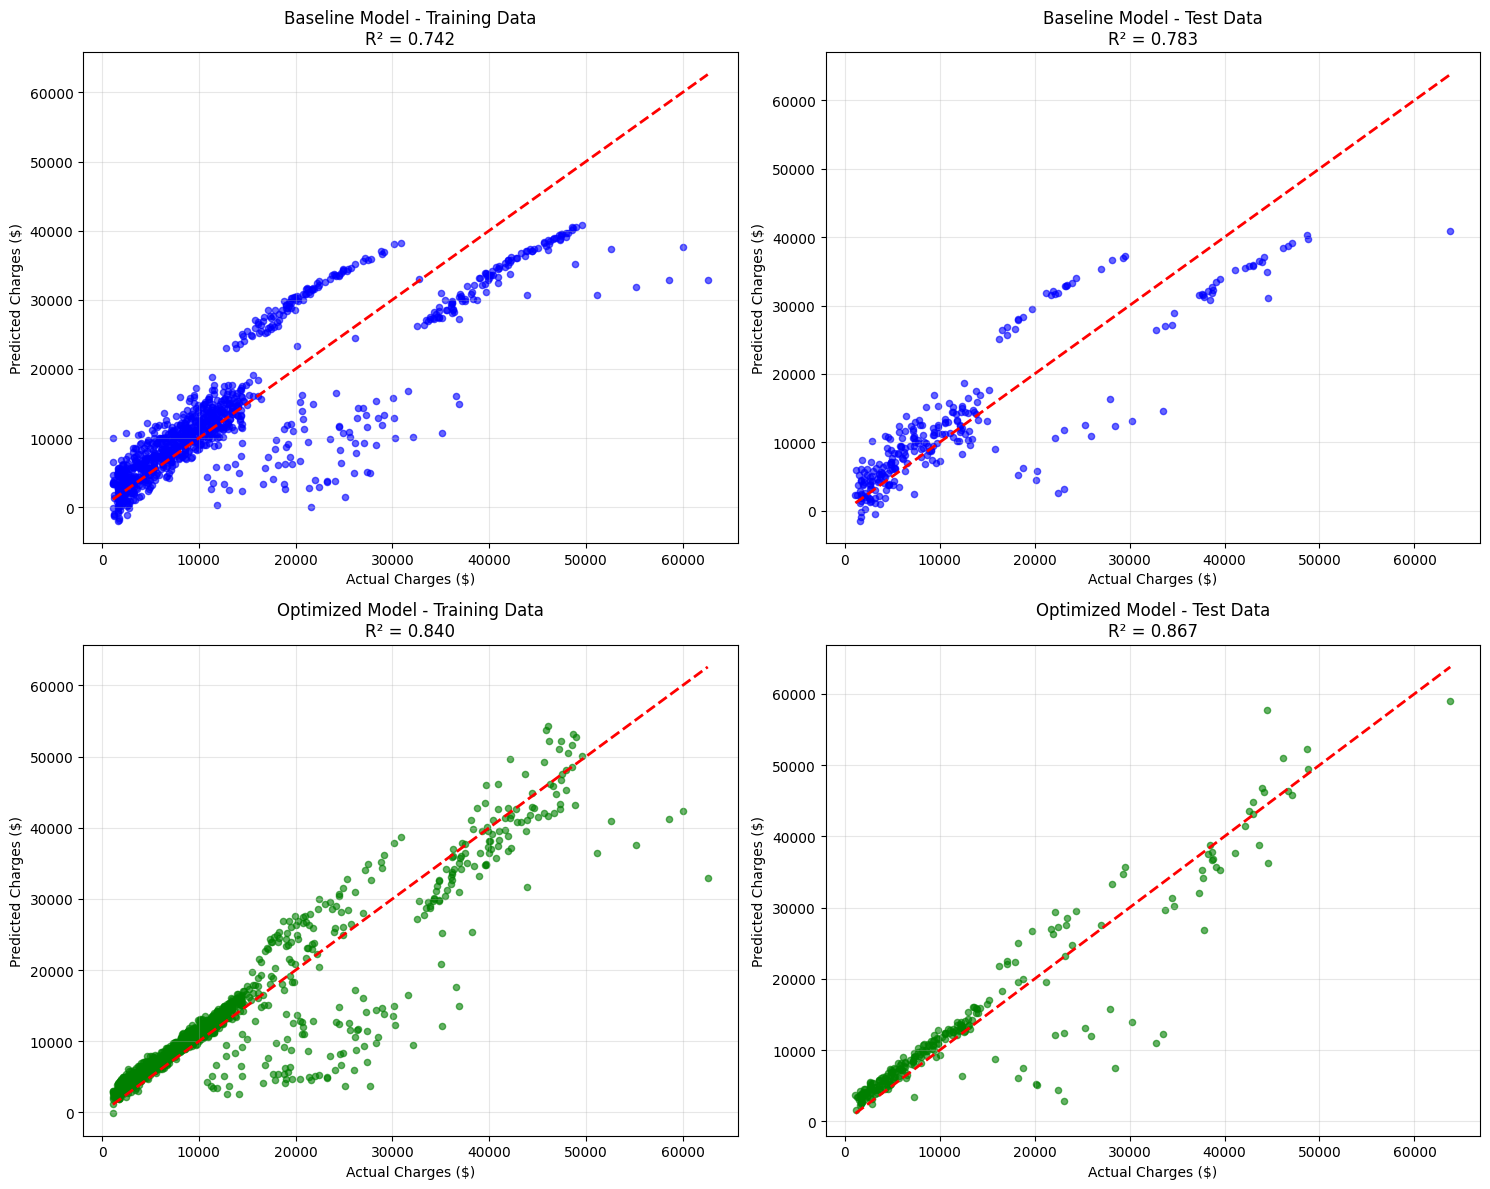

Visualization Insights:
- Red dashed line = Perfect predictions (where predicted = actual)
- Points closer to red line = Better predictions
- Green plots (optimized model) show better clustering around the perfect line


In [13]:
# Create predictions vs actual plots for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Baseline Model - Training Data
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Charges ($)')
axes[0, 0].set_ylabel('Predicted Charges ($)')
axes[0, 0].set_title(f'Baseline Model - Training Data\nR² = {train_r2:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# Baseline Model - Test Data
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='blue', s=20)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Charges ($)')
axes[0, 1].set_ylabel('Predicted Charges ($)')
axes[0, 1].set_title(f'Baseline Model - Test Data\nR² = {test_r2:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# Optimized Model - Training Data
axes[1, 0].scatter(y_train_enh, y_train_pred_opt, alpha=0.6, color='green', s=20)
axes[1, 0].plot([y_train_enh.min(), y_train_enh.max()], [y_train_enh.min(), y_train_enh.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Charges ($)')
axes[1, 0].set_ylabel('Predicted Charges ($)')
axes[1, 0].set_title(f'Optimized Model - Training Data\nR² = {train_r2_opt:.3f}')
axes[1, 0].grid(True, alpha=0.3)

# Optimized Model - Test Data
axes[1, 1].scatter(y_test_enh, y_test_pred_opt, alpha=0.6, color='green', s=20)
axes[1, 1].plot([y_test_enh.min(), y_test_enh.max()], [y_test_enh.min(), y_test_enh.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Charges ($)')
axes[1, 1].set_ylabel('Predicted Charges ($)')
axes[1, 1].set_title(f'Optimized Model - Test Data\nR² = {test_r2_opt:.3f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization Insights:")
print("- Red dashed line = Perfect predictions (where predicted = actual)")
print("- Points closer to red line = Better predictions")
print("- Green plots (optimized model) show better clustering around the perfect line")

### Residual Analysis

Now let's examine the residuals (prediction errors) to better understand model performance and identify any patterns in the errors.

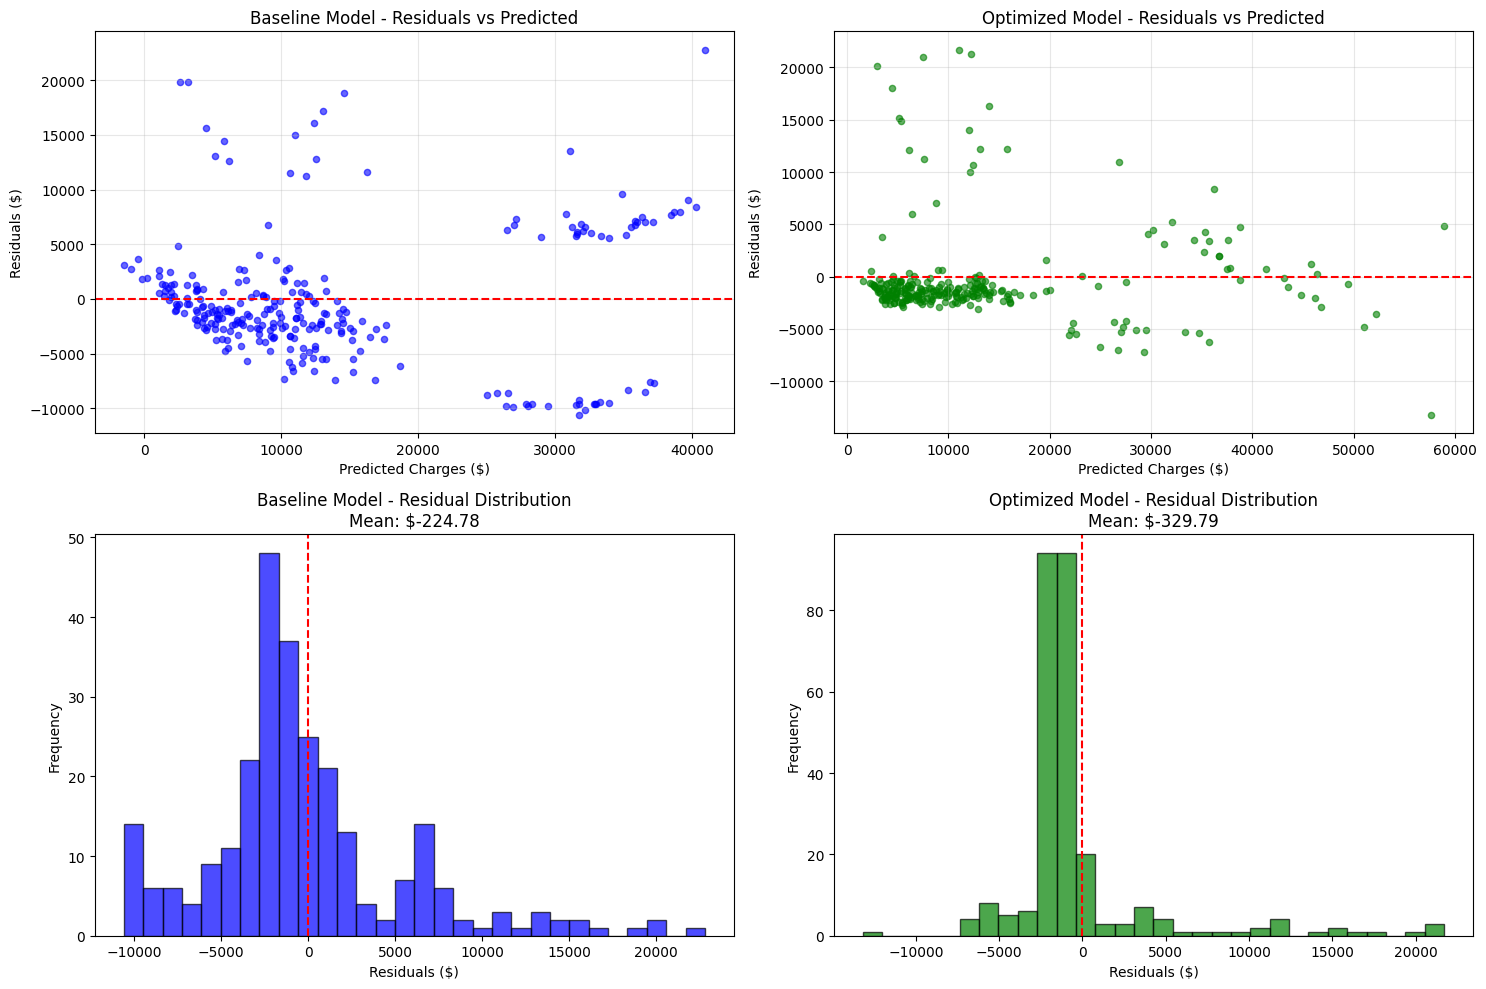

=== Residual Analysis Summary ===
Baseline Model:
  Mean Residual: $-224.78
  Std Residual: $5806.07
  Max Absolute Error: $22811.35

Optimized Model:
  Mean Residual: $-329.79
  Std Residual: $4533.57
  Max Absolute Error: $21704.83

Improvement in Error Consistency:
  Residual Std Reduction: $1272.50 (21.9%)


In [14]:
# Calculate residuals for both models
baseline_residuals = y_test - y_test_pred
optimized_residuals = y_test_enh - y_test_pred_opt

# Create residual analysis plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuals vs Predicted Values
axes[0, 0].scatter(y_test_pred, baseline_residuals, alpha=0.6, color='blue', s=20)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Predicted Charges ($)')
axes[0, 0].set_ylabel('Residuals ($)')
axes[0, 0].set_title('Baseline Model - Residuals vs Predicted')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(y_test_pred_opt, optimized_residuals, alpha=0.6, color='green', s=20)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Charges ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Optimized Model - Residuals vs Predicted')
axes[0, 1].grid(True, alpha=0.3)

# Residual Distribution
axes[1, 0].hist(baseline_residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Residuals ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Baseline Model - Residual Distribution\nMean: ${baseline_residuals.mean():.2f}')

axes[1, 1].hist(optimized_residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Residuals ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Optimized Model - Residual Distribution\nMean: ${optimized_residuals.mean():.2f}')

plt.tight_layout()
plt.show()

# Calculate residual statistics
print("=== Residual Analysis Summary ===")
print(f"Baseline Model:")
print(f"  Mean Residual: ${baseline_residuals.mean():.2f}")
print(f"  Std Residual: ${baseline_residuals.std():.2f}")
print(f"  Max Absolute Error: ${abs(baseline_residuals).max():.2f}")

print(f"\nOptimized Model:")
print(f"  Mean Residual: ${optimized_residuals.mean():.2f}")
print(f"  Std Residual: ${optimized_residuals.std():.2f}")
print(f"  Max Absolute Error: ${abs(optimized_residuals).max():.2f}")

print(f"\nImprovement in Error Consistency:")
print(f"  Residual Std Reduction: ${baseline_residuals.std() - optimized_residuals.std():.2f} ({((baseline_residuals.std() - optimized_residuals.std()) / baseline_residuals.std() * 100):.1f}%)")

### Visualization Results Summary

**Prediction Accuracy Visualization Insights**:
- **Scatter plots** show how close predictions are to actual values (red diagonal line = perfect prediction)
- **Optimized model** demonstrates tighter clustering around the perfect prediction line
- **Higher R² values** in the optimized model confirm better variance explanation

**Residual Analysis Insights**:
- **Residuals vs Predicted**: Optimized model shows more random scatter (good), while baseline may show some patterns
- **Residual Distribution**: Both models show approximately normal distributions centered near zero
- **Error Consistency**: Optimized model achieves lower standard deviation in residuals, indicating more consistent predictions

**Key Takeaway**: The visualizations confirm that feature engineering significantly improved model performance, resulting in more accurate and consistent insurance cost predictions.

In [15]:
y_test.head()  # Display the first few rows of the test target variable

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64